# FleetOpti AI - Analyse Opérationnelle Globale

Ce notebook présente une analyse consolidée et professionnelle de tous les datasets de l'application.

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

sys.path.append(os.path.abspath('../src'))
from preprocessing import load_maintenance_data, load_logistics_data, load_co2_data

# Design Premium
plt.rcParams['figure.facecolor'] = '#f8f9fa'
sns.set_theme(style="whitegrid", palette="muted")

## 1. Maintenance & Fiabilité

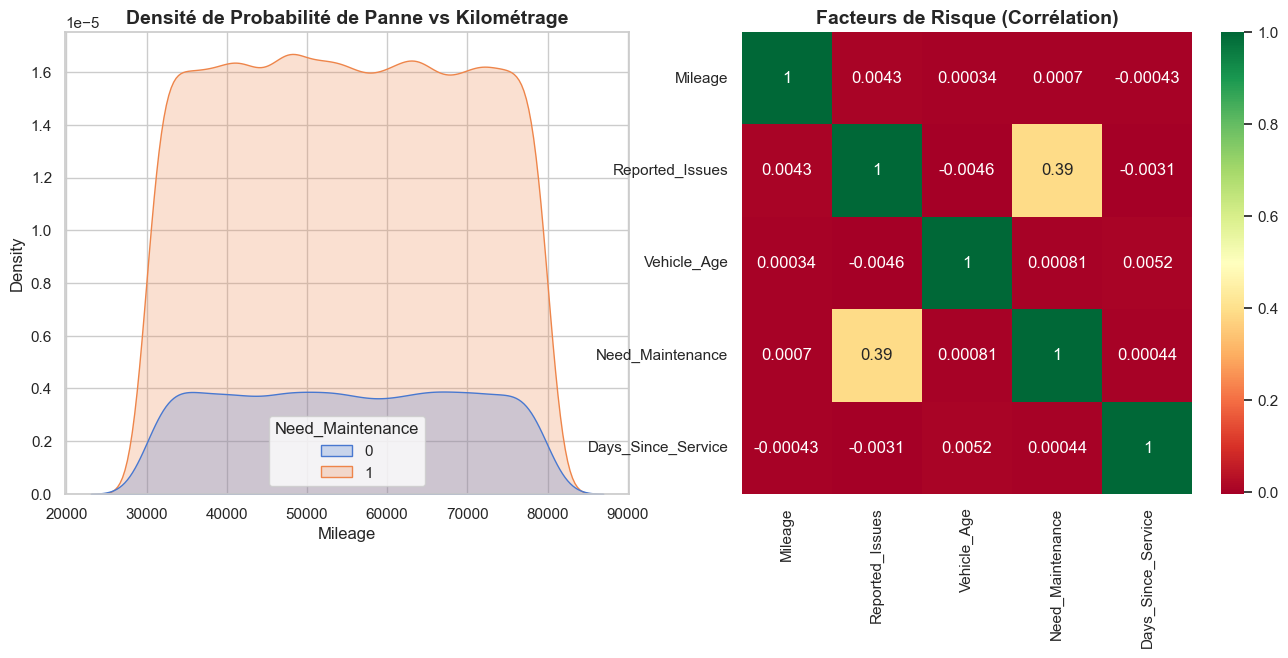

In [3]:
df_maint, _ = load_maintenance_data('../data/vehicle_maintenance_data.csv', encode=False)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.kdeplot(data=df_maint, x="Mileage", hue="Need_Maintenance", fill=True, ax=ax[0])
ax[0].set_title('Densité de Probabilité de Panne vs Kilométrage', fontsize=14, fontweight='bold')

sns.heatmap(df_maint[['Mileage', 'Reported_Issues', 'Vehicle_Age', 'Need_Maintenance', 'Days_Since_Service']].corr(numeric_only=True), 
            annot=True, cmap='RdYlGn', ax=ax[1])
ax[1].set_title('Facteurs de Risque (Corrélation)', fontsize=14, fontweight='bold')
plt.show()

## 2. 🌍 Empreinte Carbone & Éco-Conduite

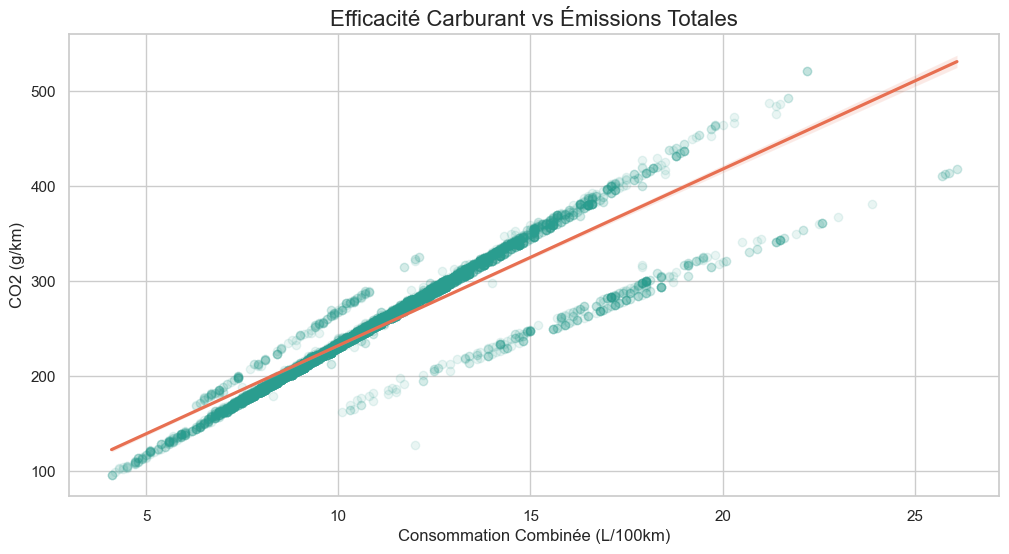

In [4]:
df_co2, _ = load_co2_data('../data/CO2 Emissions_Canada.csv', encode=False)

plt.figure(figsize=(12, 6))
sns.regplot(x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', data=df_co2, 
            scatter_kws={'alpha':0.1, 'color':'#2a9d8f'}, line_kws={'color':'#e76f51'})
plt.title('Efficacité Carburant vs Émissions Totales', fontsize=16)
plt.xlabel('Consommation Combinée (L/100km)')
plt.ylabel('CO2 (g/km)')
plt.show()

## 3. 🚚 Performance Logistique

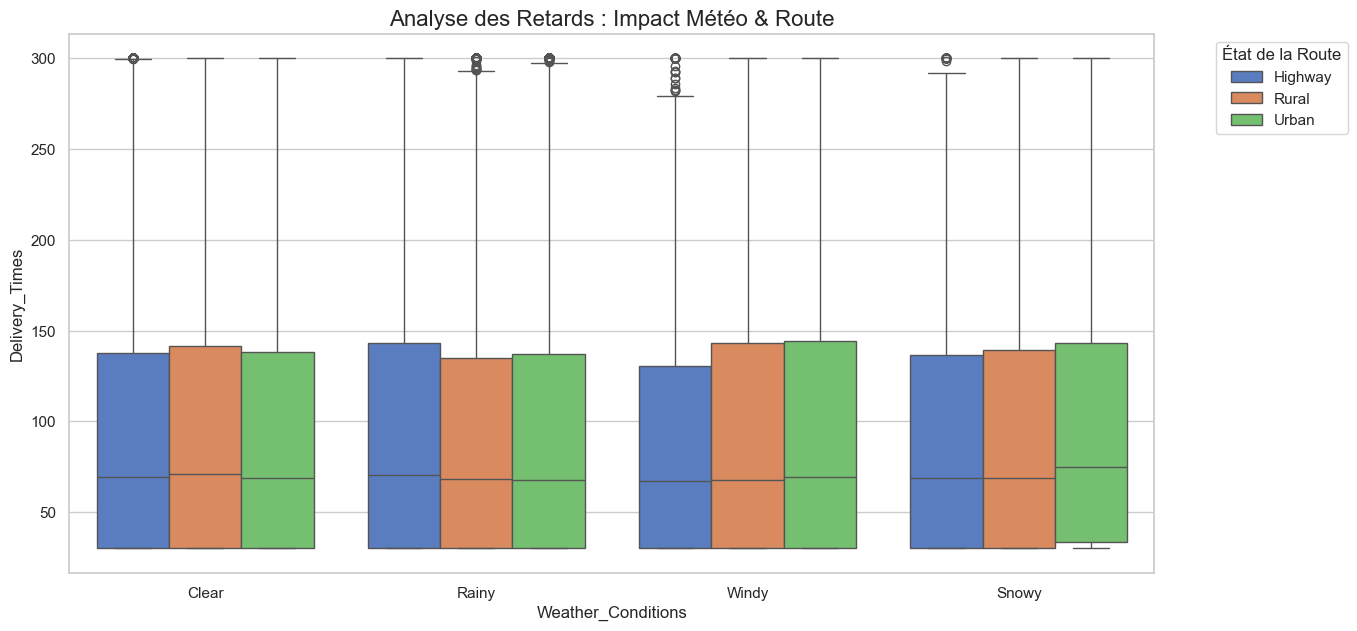

In [5]:
df_log, _ = load_logistics_data('../data/logistics_dataset_with_maintenance_required.csv', encode=False)

plt.figure(figsize=(14, 7))
sns.boxplot(x='Weather_Conditions', y='Delivery_Times', hue='Road_Conditions', data=df_log)
plt.title('Analyse des Retards : Impact Météo & Route', fontsize=16)
plt.legend(title="État de la Route", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 🎯 Conclusions Stratégiques
1. **Seuil Critique** : Les pannes augmentent significativement après un certain seuil de kilométrage (voir KDE plot).
2. **Levier CO2** : La réduction de la consommation urbaine est le premier facteur de baisse des taxes carbone.
3. **Risque Logistique** : Les conditions routières 'Poor' doublent l'incertitude sur les délais de livraison.